In [2]:
from pythonMD import manager
from unum.units import *
import matplotlib.pyplot as plt

# test single particle in 1d

## plot location

In [3]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=1)
myManager.initialize(positions=[[5.]], masses=1 * U,
                     temperature=0 * K, types=[1])
data = myManager.run(10000,forceEquations=["-1e-5*q"],
                          potentialEquations=["5e-6*(q**2)"],
                          printStats=1000,savePositions=1,printMomentum=1)
plt.plot([pos[0] for pos in data["positions"]])

TypeError: __init__() missing 1 required positional argument: 'dt'

## plot histograms

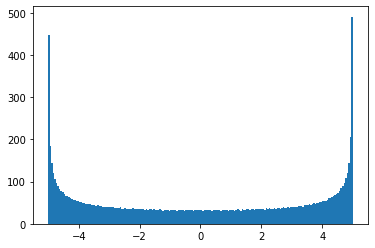

In [3]:
plt.hist([position[0][0] for position in data["positions"]],bins=200)
plt.show()

## Increase timestep and check energy convergence

In [4]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=1)

for dt in range(1,20,2):
    myManager.dt = dt
    myManager.initialize(positions=[[5.]], masses=1. * U,
                         temperature=0 * K, types=[1])
    data = myManager.run(10000,forceEquations=["-1e-5*q"],
                              potentialEquations=["5e-6*(q**2)"],
                              printStats=100000,savePositions=1)
    totalRelativeEnergy = [abs((energy-data["totalEnergy"][0])*100/energy) for energy in data["totalEnergy"]]
    totalRelativeEnergy.sort()
    print(f"maximum change in energy for dt={dt}: {totalRelativeEnergy[-1]}%")
print(f"start energy: {data['totalEnergy'][0]}")

maximum change in energy for dt=1: 0.0002253079071943973%
maximum change in energy for dt=3: 0.0015048891621324623%
maximum change in energy for dt=5: 0.006237384575205622%
maximum change in energy for dt=7: 0.007572650649457693%
maximum change in energy for dt=9: 0.018840541993078656%
maximum change in energy for dt=11: 0.02621845123711025%
maximum change in energy for dt=13: 0.030326985924101064%
maximum change in energy for dt=15: 0.055894988309503804%
maximum change in energy for dt=17: 0.040980436233811174%
maximum change in energy for dt=19: 0.08624777663841351%
start energy: 0.00012499491851660302


## Change initial position

In [5]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=1)

for p in range(1,11,2):

    myManager.initialize(positions=[[float(p)]], masses=1. * U,
                         temperature=0 * K, types=[1])
    data = myManager.run(10000,forceEquations=["-1e-5*q"],
                              potentialEquations=["5e-6*(q**2)"],
                              printStats=100000,savePositions=1)
    data["positions"].sort()
    print(data["positions"][0],data["positions"][-1])

[[-0.99999992]] [[0.99999997]]
[[-2.99999976]] [[2.9999999]]
[[-4.9999996]] [[4.99999983]]
[[-6.99999945]] [[6.99999976]]
[[-8.99999929]] [[8.99999969]]


# test 3 particles in 1d

## plot locations

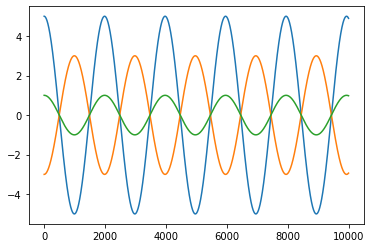

In [6]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=1)
myManager.initialize(positions=[[5.],[-3],[1.]], masses=1. * U,
                     temperature=0 * K, types=[1])
data = myManager.run(10000,forceEquations=["-1e-5*q"],
                          potentialEquations=["5e-6*(q**2)"],
                          printStats=100000,savePositions=1)

first = [pos[0][0] for pos in data["positions"]]
second = [pos[1][0] for pos in data["positions"]]
third = [pos[2][0] for pos in data["positions"]]
plt.plot(first)
plt.plot(second)
plt.plot(third)

## Increase timestep and check energy convergence

In [7]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=1)

for dt in range(1,20,2):
    myManager.dt = dt
    myManager.initialize(positions=[[5.],[-3],[1.]], masses=1. * U,
                         temperature=0 * K, types=[1])
    data = myManager.run(10000,forceEquations=["-1e-5*q"],
                              potentialEquations=["5e-6*(q**2)"],
                              printStats=100000,savePositions=1)
    totalRelativeEnergy = [abs((energy-data["totalEnergy"][0])*100/energy) for energy in data["totalEnergy"]]
    totalRelativeEnergy.sort()
    print(f"maximum change in energy for dt={dt}: {totalRelativeEnergy[-1]}%")
print(f"start energy: {data['totalEnergy'][0]}")

maximum change in energy for dt=1: 0.00022530790748558438%
maximum change in energy for dt=3: 0.001504889162370984%
maximum change in energy for dt=5: 0.006237384575323327%
maximum change in energy for dt=7: 0.0075726506486802235%
maximum change in energy for dt=9: 0.01884054199292061%
maximum change in energy for dt=11: 0.026218451237618574%
maximum change in energy for dt=13: 0.03032698592422182%
maximum change in energy for dt=15: 0.055894988309711235%
maximum change in energy for dt=17: 0.04098043623370281%
maximum change in energy for dt=19: 0.0862477766384229%
start energy: 0.0001749928859232441


# test single particle in 3d

## plot location

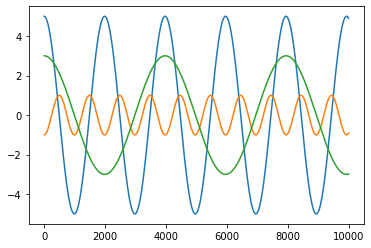

In [8]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=3)
myManager.initialize(positions=[[5.,-1.,3.]], masses=1. * U,
                     temperature=0 * K, types=[1])
data = myManager.run(10000,forceEquations=["-1e-5*q","-4e-5*q","-2.5e-6*q"],
                          potentialEquations=["5e-6*(q**2)","2e-5*(q**2)","1.25e-6*(q**2)"],
                          printStats=100000,savePositions=1)
plt.plot([pos[0] for pos in data["positions"]])

## Increase timestep and check energy convergence

In [9]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=3)

for dt in range(1,20,2):
    myManager.dt = dt
    myManager.initialize(positions=[[5.,-1.,3.]], masses=1. * U,
                         temperature=0 * K, types=[1])
    data = myManager.run(10000,forceEquations=["-1e-5*q","-4e-5*q","-2.5e-6*q"],
                              potentialEquations=["5e-6*(q**2)","2e-5*(q**2)","1.25e-6*(q**2)"],
                              printStats=100000,savePositions=1)
    totalRelativeEnergy = [abs((energy-data["totalEnergy"][0])*100/energy) for energy in data["totalEnergy"]]
    totalRelativeEnergy.sort()
    print(f"maximum change in energy for dt={dt}: {totalRelativeEnergy[-1]}%")
print(f"start energy: {data['totalEnergy'][0]}")

maximum change in energy for dt=1: 0.00018563557254617325%
maximum change in energy for dt=3: 0.0022293176063969307%
maximum change in energy for dt=5: 0.005004577633296943%
maximum change in energy for dt=7: 0.012097119897685207%
maximum change in energy for dt=9: 0.016480614936496926%
maximum change in energy for dt=11: 0.020276393791655925%
maximum change in energy for dt=13: 0.04228547038428876%
maximum change in energy for dt=15: 0.04515144492908836%
maximum change in energy for dt=17: 0.06936485067288013%
maximum change in energy for dt=19: 0.0928324587126188%
start energy: 0.00015623276443974554


## Use thermostat

### Langevin

10000 6.0879600972497 4.200692467102293e-23 3.950777260760672e-23 8.151469727862965e-23
20000 0.5565690714396111 3.8403265929333164e-24 1.0248772117331427e-20 1.025261244392436e-20
30000 1358.5786211828565 9.37419248616171e-21 1.6193577361070508e-23 9.390386063522781e-21
40000 10.325390922629248 7.124519736614182e-23 4.6351099124421916e-23 1.1759629649056372e-22
50000 159.7050772605395 1.1019650330977226e-21 2.6480540607442107e-21 3.750019093841933e-21
60000 102.55202083580146 7.076089437670301e-22 3.927539135579769e-21 4.635148079346799e-21
70000 8.021815616493027 5.535052775380189e-23 8.721280641504545e-21 8.776631169258348e-21
80000 22.947657767090096 1.5833883859292167e-22 1.833885200310275e-21 1.9922240389031968e-21
90000 21.055406761694492 1.45282306655692e-22 1.4787489381213546e-21 1.6240312447770466e-21
100000 697.2882418656064 4.811288868872684e-21 1.7194093671140987e-21 6.530698235986783e-21
110000 349.08071551678023 2.4086569370657838e-21 7.496791467953104e-22 3.158336083861

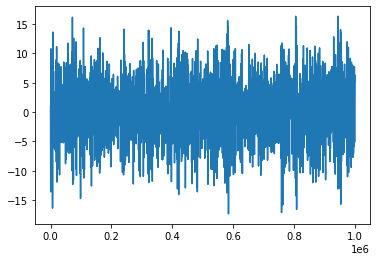

In [4]:
propagationScheme = [("Langevin",0.5),("VelocityVerlet",1.),("Langevin",0.5)]
myManager = manager(forces=["CoordsEquationPotential"],prop=propagationScheme,boundariesType=None,dimensions=1)
myManager.initialize(positions=[[1.]], masses=1 * U,
                     temperature=300 * K, types=[1])
dataLangevin = myManager.run(1000000,forceEquations=["-1e-5*q"],
                          potentialEquations=["5e-6*(q**2)"], temperature=300, gamma=1e-3,
                          printStats=10000,savePositions=1,printMomentum=1,saveStats=10)
plt.plot([pos[0] for pos in dataLangevin["positions"]])

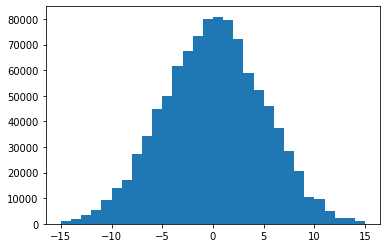

In [6]:
plt.hist([position[0][0] for position in dataLangevin["positions"]],bins=30,range=[-15,15])
plt.show()

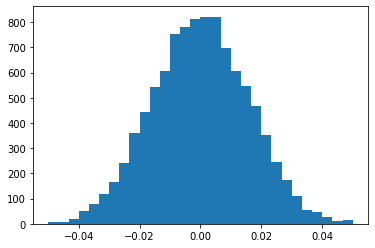

In [7]:
plt.hist([momentum[0][0] for momentum in dataLangevin["momenta"]],bins=30,range=[-0.05,0.05])
plt.show()

In [9]:
import numpy
numpy.mean(dataLangevin["T"])

302.86819801437224

### CSVR

10000 57.89952769502339 3.9950674109566137e-22 4.724213278720645e-24 4.04230954374382e-22
20000 676.4438202366574 4.667462359632936e-21 5.393800018923516e-22 5.206842361525288e-21
30000 289.2468808762874 1.995803478046383e-21 3.485259632184341e-24 1.9992887376785674e-21
40000 964.0462624724084 6.651919211059619e-21 1.1526926331077021e-21 7.804611844167321e-21
50000 43.6447295014333 3.0114863355988975e-22 1.5281379778417396e-22 4.539624313440637e-22
60000 15.105998897909641 1.0423139239557653e-22 3.547833115304507e-21 3.652064507700083e-21
70000 532.4441314460504 3.673864506977748e-21 4.561181953856908e-21 8.235046460834656e-21
80000 122.39155580341009 8.445017350435296e-22 3.863744037878911e-21 4.708245772922441e-21
90000 1087.928656233214 7.506707728009177e-21 2.8932274193631815e-21 1.0399935147372359e-20
100000 280.71178508815854 1.9369113171082938e-21 1.5251933926487254e-22 2.0894306563731662e-21
110000 716.0809114653526 4.9409582891109335e-21 1.5452753576194864e-21 6.48623364673042

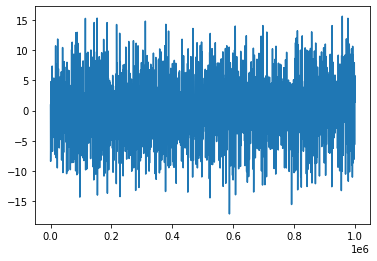

In [10]:
propagationScheme = [("VelocityVerlet",1.),("CSVR",1)]
myManager = manager(forces=["CoordsEquationPotential"],prop=propagationScheme,boundariesType=None,dimensions=1)
myManager.initialize(positions=[[1.]], masses=1 * U,
                     temperature=300 * K, types=[1])
dataCSVR = myManager.run(1000000,forceEquations=["-1e-5*q"],
                          potentialEquations=["5e-6*(q**2)"], temperature=300, gamma=1e-3,
                          printStats=10000,savePositions=1,printMomentum=1,saveStats=10)
plt.plot([pos[0] for pos in dataCSVR["positions"]])

In [ ]:
plt.hist([position[0][0] for position in dataCSVR["positions"]],bins=30,range=[-15,15])
plt.show()

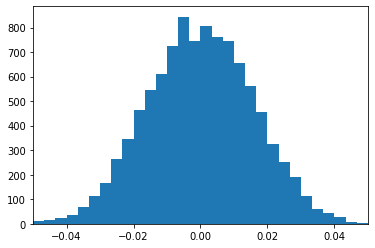

In [11]:
plt.hist([momentum[0][0] for momentum in dataCSVR["momenta"]],bins=30,range=[-0.05,0.05])
plt.xlim([-0.05,0.05])
plt.show()

302.86819801437224

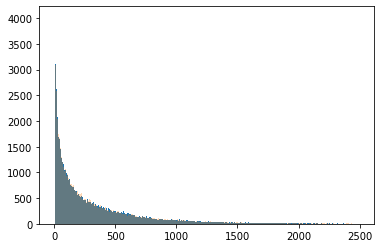

In [30]:
hist = plt.hist(dataLangevin["T"],bins=[5*i for i in range(1,500)])
hist = plt.hist(dataCSVR["T"],bins=[5*i for i in range(1,500)],alpha=0.3)
numpy.mean(dataLangevin["T"])

299.7517980872262

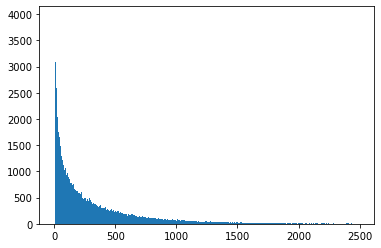

In [26]:
hist = plt.hist(dataCSVR["T"],bins=[5*i for i in range(1,500)])
numpy.mean(dataCSVR["T"])